In [1]:
import networkx as nx
import numpy as np
from causality.pc.CausalGraphBuilder import CausalGraphBuilder
from causality.pc.EdgeOrientation import EdgeOrientation
from causality.pc.independence.GaussIndependenceTest import GaussConditionalIndepTest
from causality.pc.pag.PagDrawer import PagDrawer
from causality.pc.pag.PagEdge import PagEdge
from IPython.display import Image

Initialization of builders

In [2]:
# when we observe every needed variables (Causal Sufficiency is satisfied)
pc_builder = CausalGraphBuilder('pc', p_value=0.01)

# when there are hidden variables affecting at least two others (Causal Sufficiency isn't satisfied)
fci_builder = CausalGraphBuilder('fci', p_value=0.01)

### Example of inference v-structure

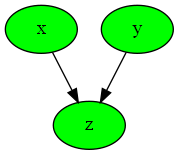

In [3]:
# data generation
n_samples = 50
x = np.random.randn(n_samples, 1)
y = np.random.randn(n_samples, 1)
z = x + y
data = np.hstack((x, y, z))
n_variables = data.shape[1]

pc_builder.fit(data)
pag_edges = pc_builder.get_edges()

Image(PagDrawer.draw(pag_edges, n_variables, labels=['x', 'y', 'z']))

### Example of inference NON v-structure

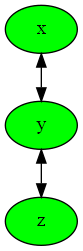

In [4]:
# data generation
n_samples = 50
x = np.random.randn(n_samples, 1)
y = np.multiply(x.flatten(), np.random.uniform(0.5, 1.5, n_samples)).reshape(-1, 1)
z = np.multiply(y.flatten(), np.random.uniform(0.5, 1.5, n_samples)).reshape(-1, 1)
data = np.hstack((x, y, z))
n_variables = data.shape[1]

pc_builder.fit(data)
pag_edges = pc_builder.get_edges()

Image(PagDrawer.draw(pag_edges, n_variables, labels=['x', 'y', 'z']))

### Example of inference without causal sufficiency

In [5]:
# data generation
n_samples = 500
x = np.random.randn(n_samples, 1)
h = np.random.randn(n_samples, 1)
y = np.multiply(x.flatten(), np.random.uniform(0.5, 1.5, n_samples)) +\
    np.multiply(h.flatten(), np.random.uniform(0.5, 1.5, n_samples))
z = np.multiply(y.flatten(), np.random.uniform(0.5, 1.5, n_samples)) +\
    np.multiply(h.flatten(), np.random.uniform(0.5, 1.5, n_samples))
y = y.reshape(-1, 1)
z = z.reshape(-1, 1)

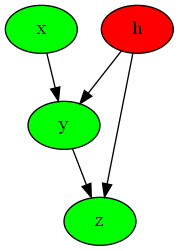

In [6]:
# Let's try to infer the structure with CS (observing all variables)

data = np.hstack((h, x, y, z))
n_variables = data.shape[1]

pc_builder.fit(data)
pag_edges = pc_builder.get_edges()
Image(PagDrawer.draw(pag_edges, n_variables, labels=['h', 'x', 'y', 'z'], colors=['red'] + ['green']*3))

That's a true graph if we observe all variables. Let's hide red variable.

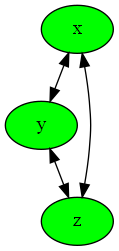

In [7]:

data = np.hstack((x, y, z))
n_variables = data.shape[1]
pc_builder.fit(data)
pag_edges = pc_builder.get_edges()
Image(PagDrawer.draw(pag_edges, n_variables, labels=['x', 'y', 'z']))

The main problem of this output is an edge between **x** and __z__. They are not connected directly in the true graph.
Also there is no any strictly oriented edge, so it's impossible to understand which of variables are causes and which
are effects.

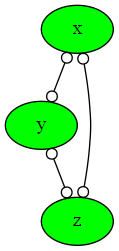

In [8]:
# Let's try FCI algorithm

data = np.hstack((x, y, z))
n_variables = data.shape[1]
fci_builder.fit(data)
pag_edges = fci_builder.get_edges()
Image(PagDrawer.draw(pag_edges, n_variables, labels=['x', 'y', 'z']))

Here is a strange end on edges: circle. It means "uncertainty". An edge \\[a \to b\\] in graphs without CS means that
there is no influence of **b** on __a__. And double-arrow edge actually means that there is a hidden variable which
affects on both variables.

To wrap it up, this output of FCI algorithm is totally equivalent to output of PC algorithm: all variables are
connected, but it's impossible to understand how.

### Very synthetic illustration when FCI algorithm infers structure much better than PC

It looks very frightening, but that's good news: it's not so easy to come up with an example when FCI
would actually beat PC.

_You can skip this example, it is not that necessary for understanding following things_, but it will show advantages
of FCI algorithm.

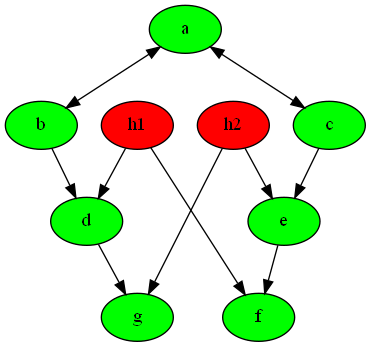

In [9]:
n_samples = 50000
a = np.random.randn(n_samples, 1)
h1 = np.random.randn(n_samples, 1)
h2 = np.random.randn(n_samples, 1)
b = np.multiply(a.flatten(), np.random.uniform(0.5, 1.5, n_samples)).reshape(-1, 1)
c = np.multiply(a.flatten(), np.random.uniform(0.5, 1.5, n_samples)).reshape(-1, 1)
d = np.multiply(b.flatten(), np.random.uniform(0.5, 1.5, n_samples)) +\
    np.multiply(h1.flatten(), np.random.uniform(0.5, 1.5, n_samples))
e = np.multiply(c.flatten(), np.random.uniform(0.5, 1.5, n_samples)) +\
    np.multiply(h2.flatten(), np.random.uniform(0.5, 1.5, n_samples))
f = np.multiply(h1.flatten(), np.random.uniform(0.5, 1.5, n_samples)) +\
    np.multiply(e.flatten(), np.random.uniform(0.5, 1.5, n_samples))
g = np.multiply(h2.flatten(), np.random.uniform(0.5, 1.5, n_samples)) +\
    np.multiply(d.flatten(), np.random.uniform(0.5, 1.5, n_samples))
d = d.reshape(-1, 1)
e = e.reshape(-1, 1)
f = f.reshape(-1, 1)
g = g.reshape(-1, 1)

# Let's try to infer the structure with CS (observing all variables)

data = np.hstack((h1, h2, a, b, c, d, e, f, g))
n_variables = data.shape[1]

pc_builder.fit(data)
pag_edges = pc_builder.get_edges()
Image(PagDrawer.draw(pag_edges, n_variables, labels=['h1', 'h2', 'a', 'b', 'c', 'd', 'e', 'f', 'g'], colors=['red'] * 2 + (n_variables - 2) * ['green']))

This graph is almost "true" graph. The only problem is that edges adjacent to **a** are not oriented, but that's
totally ok, it is impossible to orient them. Let's hide __h1__ and __h2__ and still use PC algorithm.

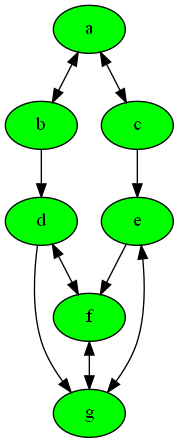

In [10]:
data = np.hstack((a, b, c, d, e, f, g))
n_variables = data.shape[1]

pc_builder.fit(data)
pag_edges = pc_builder.get_edges()
Image(PagDrawer.draw(pag_edges, n_variables, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g']))


As one can notice, there are some extra edges: \\[ d \leftrightarrow f\\], \\[ e \leftrightarrow g\\] (these pairs are
consequences of __h1__ and __h2__ respectively), and \\[ f \leftrightarrow g\\]. If we observe all variables, then
**f, g** are simply separated with known __h1__ or __h2__, without them they are d-separated via __{a, d}__, but we
won't check this set as __a__ is not a neighbor of **f or g**.

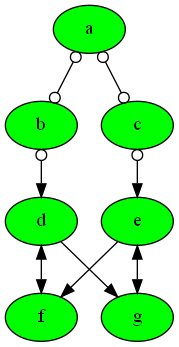

In [11]:
fci_builder.fit(data)
pag_edges = fci_builder.get_edges()
Image(PagDrawer.draw(pag_edges, n_variables, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g']))

Here we have two double-arrow edges: \\[ d \leftrightarrow f\\], \\[ e \leftrightarrow g\\]. Unlike PC output, here
such edges mean that there are hidden causes between these pairs, and that's true! Also an edge
\\[ f \leftrightarrow g\\] has been eliminated! So this output is much more correct than output of PC algorithm!


### Using new orientation method

#### Creating skeleton of the graph

In [12]:
n_samples = 500
x = np.random.randn(n_samples, 1)
y = np.random.randn(n_samples, 1)
z = x + y
data = np.hstack((x, y, z))
n_variables = data.shape[1]

pc_builder.fit(data)
pag_edges = pc_builder.get_edges()
skeleton = nx.from_edgelist(list(map(PagEdge.to_regular_edge, pag_edges)))

#### Preparing class for orientation

In [13]:
indep_test_func = GaussConditionalIndepTest(np.corrcoef(data.T), sample_size=n_samples).gauss_ci_test
edge_orienter = EdgeOrientation(skeleton=skeleton,
                                sep_sets=pc_builder.get_sepsets(),
                                n_nodes=n_variables,
                                indep_test_func=indep_test_func,
                                threshold=0)

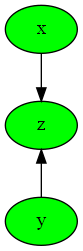

In [14]:
edge_orienter.orient_colliders()
edge_orienter.apply_rules(pc=True)
pag_edges = edge_orienter.get_pag()
Image(PagDrawer.draw(pag_edges, n_variables, labels=['x', 'y', 'z']))

### Advantages of new orientation method

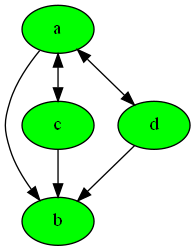

In [15]:
n_samples = 5000
a = np.random.randn(n_samples, 1)
b = a + np.random.randn(n_samples, 1) * 0.05
c = np.multiply(a.flatten(), np.random.uniform(0.5, 1.5, n_samples)) +\
    np.multiply(b.flatten(), np.random.uniform(0.5, 1.5, n_samples))
d = np.multiply(a.flatten(), np.random.uniform(0.5, 1.5, n_samples)) +\
    np.multiply(b.flatten(), np.random.uniform(0.5, 1.5, n_samples))
b = b.reshape(-1, 1)
c = c.reshape(-1, 1)
d = d.reshape(-1, 1)
data = np.hstack((a, b, c, d))
n_variables = data.shape[1]

pc_builder.fit(data)
pag_edges = pc_builder.get_edges()
skeleton = nx.from_edgelist(list(map(PagEdge.to_regular_edge, pag_edges)))
Image(PagDrawer.draw(pag_edges, n_variables, labels=['a', 'b', 'c', 'd']))

Graph which was inferred with a classic PC algorithm is incorrect, as **c** and __d__ (the only nonadjacent pair) are
conditionally independent given only one of two other variables. However, they should be separated only given both of
them! So when algorithm decided that \\[(c \perp d | {a}) \\] instead of \\[(c \perp d | {a, b}) \\], it orients edges
from these variables to \\[b\\]. An edge \\[a \to b \\] appears after applying orientation rules.

In [16]:
indep_test_func = GaussConditionalIndepTest(np.corrcoef(data.T), sample_size=n_samples).gauss_ci_test
edge_orienter = EdgeOrientation(skeleton=skeleton,
                                sep_sets=pc_builder.get_sepsets(),
                                n_nodes=n_variables,
                                indep_test_func=indep_test_func,
                                threshold=5e-1)

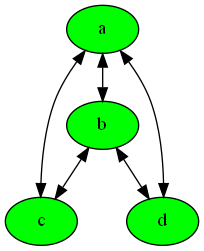

In [17]:
edge_orienter.orient_colliders()
edge_orienter.apply_rules(pc=True)
pag_edges = edge_orienter.get_pag()
Image(PagDrawer.draw(pag_edges, n_variables, labels=['a', 'b', 'c', 'd']))

As one can see, via proposed algorithm there is no strictly oriented edges, and it reproduces the only possible
class of equivalence corresponding to the true structure.

